This notebook is used to figure out the right values for the logistic growth curve that describes how quickly we can build seaweed farms in a nuclear winter. 

In [1]:
import math
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)
np.random.seed(42)

plt.style.use(
    "https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle"
)

In [2]:
def logistic_curve(x, max_L, k, x0, off):
    """
    Describes a logistic growth curve
    see for example:
    https://stackoverflow.com/questions/60160803/scipy-optimize-curve-fit-for-logistic-function
    Arguments:
        x: value to calculate
        max_L: maximum value of the curve
        k: the logistic growth rate
        x0: the sigmoid's midpoint
        off: offset to 0
    Returns
        float: y value corresponding to x
    """
    return max_L / (1 + np.exp( - k * (x - x0))) + off

In [3]:
# Data
x = [0,10, 90, 30, 80, 60] # days
y = [0,1, 3000, 200, 2800, 2000] # amount farms build km²

In [4]:
popt, _ = curve_fit(logistic_curve, x,y, p0=[3000, 1, 50, 50])
popt

/tmp/ipykernel_25686/2781953268.py:15: RuntimeWarning: overflow encountered in exp
  return max_L / (1 + np.exp(-k*(x-x0)))+off


array([ 3.05787695e+03,  1.04054430e-01,  5.36843940e+01, -2.63155314e+01])

In [5]:
x_sim = np.linspace(0,100,10000)
y_sim = [logistic_curve(i, popt[0], popt[1], popt[2], popt[3]) for i in x_sim]

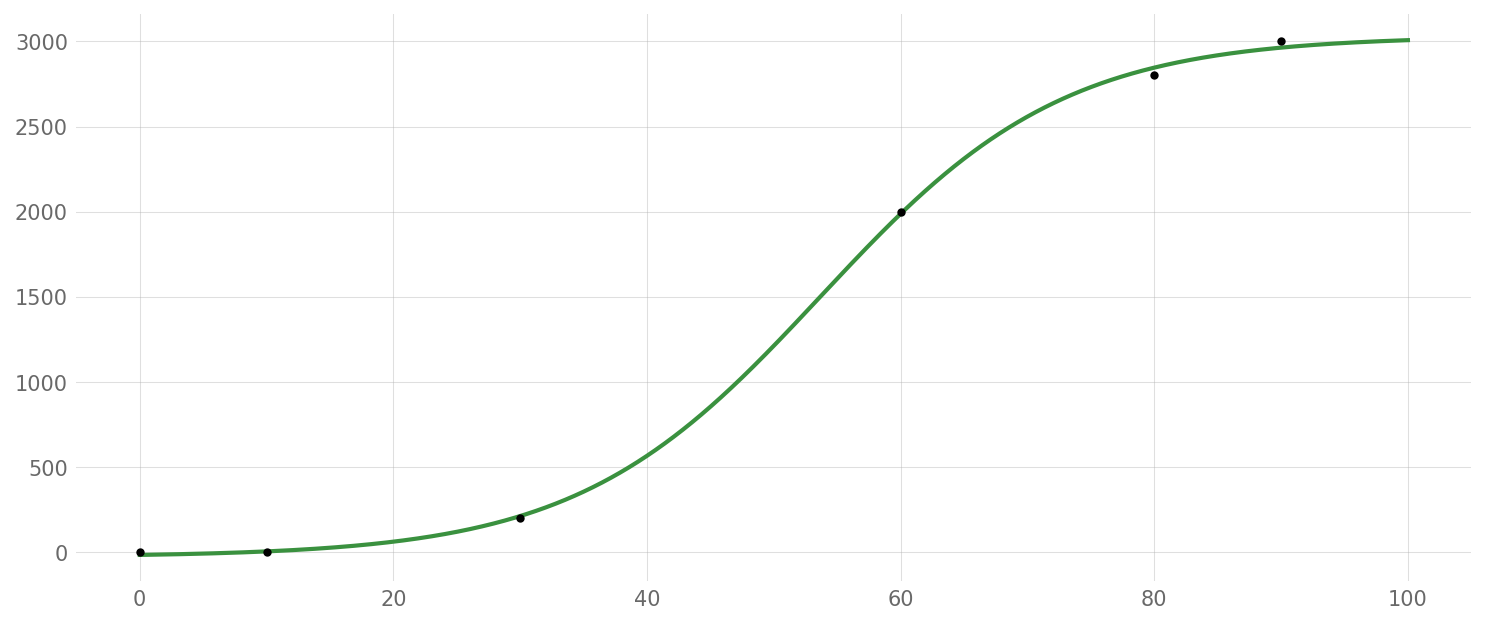

In [7]:
plt.plot(x_sim, y_sim)
plt.scatter(x,y, color="black", zorder=5)